<center>

# TP7 - SVD, compression et débruitage d'image

2024/2025 - T. Godin, L. Naert  
IUT de Vannes, BUT Informatique

</center>

***

_Merci à Eddie Aamari et aux enseignants de Paris Sorbonne Cité qui ont partagé le document dont ce TP est issu_

***


Téléchargez l'archive `data.zip` depuis la page moodle du cours. Copiez l'archive `data.zip` dans le même dossier que ce notebook et décompressez-la. Vous devez voir apparaître un dossier `data` contenant trois fichiers : `im1.npy`, `im2.npy`, `im3.npy`.

Pour commencer, on charge les packages et fichiers nécessaires.

In [67]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

plt.set_cmap("gray")  # Permet d'afficher les images en niveaux de gris


<Figure size 640x480 with 0 Axes>

## Affichage d'images

Nous allons commencer par afficher les images associées aux 3 fichiers `im1.npy`, `im2.npy`, `im3.npy` et de choisir votre préférée pour travailler avec elle pour la suite du TP.

>__Question 1__ (affichage d'images) :
1. En utilisant les commandes `M1=np.load('data/im1.npy')`, `type(M1)` et `M1.shape`, indiquer de quel type est la variable `M1`, et ses caractéristiques. Faire de même pour les deux autres fichiers `im2.npy`, `im3.npy`, en définissant deux nouvelles variables `M2` et  `M3`.
- À l'aide de la commande `plt.imshow`, afficher les 3 images associées à `M1`, `M2` et `M3`. Choisissez votre préférée pour la suite et renommez-la `M`.

M1 : <class 'numpy.ndarray'> (798, 1280)
M2 : <class 'numpy.ndarray'> (853, 1280)
M3 : <class 'numpy.ndarray'> (859, 1280)


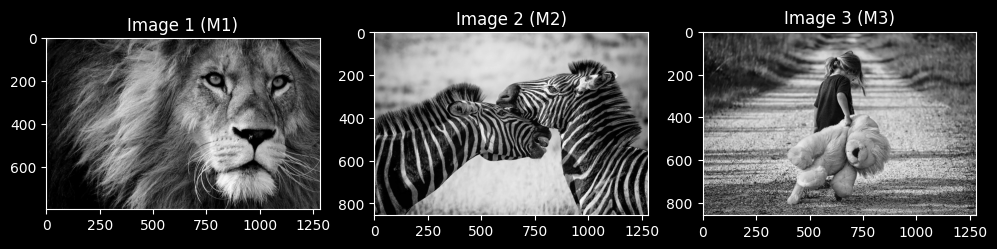

In [68]:
M1 = np.load("data/im1.npy")
M2 = np.load("data/im2.npy")
M3 = np.load("data/im3.npy")

print("M1 :", type(M1), M1.shape)
print("M2 :", type(M2), M2.shape)
print("M3 :", type(M3), M3.shape)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(M1)
plt.title("Image 1 (M1)")

plt.subplot(1, 3, 2)
plt.imshow(M2)
plt.title("Image 2 (M2)")

plt.subplot(1, 3, 3)
plt.imshow(M3)
plt.title("Image 3 (M3)")

plt.show()


Réponse 1. :  

`M1`, `M2`, et `M3` sont des objets de type `numpy.ndarray`.  

Dimensions des matrices :
- `M1.shape` : (798, 1280) de l'image 1.
- `M2.shape` : (853, 1280) de l'image 2.
- `M3.shape` : (859, 1280) de l'image 3.


In [69]:
M = M1


## Décomposition en valeurs singulières (SVD)
Toute matrice $M \in \mathcal{M}_{n,m}(\mathbb{R})$ admet une décomposition en valeurs singulières (SVD) donnée par :

<center>

$M = U\Sigma V^\top$

</center>

où $U\in \mathcal{M}_{n}(\mathbb{R})$, $V\in \mathcal{M}_{m}(\mathbb{R})$ sont des matrices orthogonales  (c'est à dire que $U U^\top = U^\top U = I_n $ et  $V V^\top = V^\top V = I_m $) et $\Sigma \in \mathcal{M}_{n,m}(\mathbb{R})$ est une matrice diagonale (au sens des matrices rectangulaires) contenant les valeurs singulières de $M$.


Les valeurs singulières d'une matrices sont, en quelque sorte, la généralisation pour les matrices rectangulaires des valeurs propres vues durant les TP précédents.

>__Question 2__
A l'aide de la commande `U,S,Vt=la.svd(M)`, effectuer la décomposition en valeurs singulières de `M`. Quels sont les formats de `U`, `S` et `Vt` ? Est-ce cohérent avec l'explication donnée au dessus (et avec le cours) ? Que contient `S`?

In [70]:
U, S, Vt = la.svd(M)

print("Format de U :", U.shape)
print("Format de S :", S.shape)
print("Format de Vt :", Vt.shape)

print("Valeurs singulières contenues dans S :", S)


Format de U : (798, 798)
Format de S : (798,)
Format de Vt : (1280, 1280)
Valeurs singulières contenues dans S : [9.65144216e+04 1.92993970e+04 1.80602048e+04 1.26158316e+04
 9.13251936e+03 7.71933620e+03 7.37004313e+03 6.83842310e+03
 6.36093377e+03 5.82093412e+03 5.57733214e+03 5.38740494e+03
 4.95912310e+03 4.59418736e+03 4.38354145e+03 4.22321998e+03
 4.04433295e+03 3.93132880e+03 3.87976219e+03 3.72120976e+03
 3.62115467e+03 3.41586998e+03 3.37414072e+03 3.12161936e+03
 3.07524876e+03 2.97594051e+03 2.95202216e+03 2.93254976e+03
 2.83628083e+03 2.80830692e+03 2.76154895e+03 2.72464930e+03
 2.67559433e+03 2.66409826e+03 2.61709895e+03 2.55587736e+03
 2.53410398e+03 2.51225969e+03 2.47978192e+03 2.44665987e+03
 2.39608632e+03 2.37698281e+03 2.32310733e+03 2.28189371e+03
 2.25930730e+03 2.23357298e+03 2.21387285e+03 2.19270014e+03
 2.17599623e+03 2.16390013e+03 2.13869628e+03 2.11322469e+03
 2.09102645e+03 2.06827724e+03 2.06105212e+03 2.04059398e+03
 2.02633807e+03 2.00983454e+03 1.

Réponse :  

- Format de `U` : (798, 798), ce qui est cohérent, car `U` est une matrice orthogonale de taille (n, n), où `n` est le nombre de lignes de la matrice `M`.
- Format de `S` : (798,), ce qui correspond à un vecteur contenant les valeurs singulières de `M`. Il ne s'agit pas d'une matrice diagonale complète (comme $\Sigma$) mais uniquement des valeurs singulières, classées de la plus grande à la plus petite. 
- Format de `Vt` : (1280, 1280), ce qui est cohérent, car `Vt` (ou $V^\top$) est une matrice orthogonale de taille (m, m), où `m` est le nombre de colonnes de la matrice `M`.

Les valeurs singulières contenues dans `S` représentent les échelles de transformation effectuées par la matrice `M` dans ses directions principales. Ces valeurs sont rangées dans un ordre décroissant et peuvent être utilisées pour estimer l'importance des différentes composantes dans l'information portée par la matrice. Les plus grandes valeurs singulières capturent la majorité de l'information de la matrice.


>__Question 3__
1. Écrire une fonction `build(S,n,m)` qui prend en entrée un vecteur `S` et fournit en sortie la matrice $\Sigma$ décrite au dessus : une matrice diagonale (au sens des matrices rectangulaires) de taille $n\times m$, dont les éléments diagonaux sont `S[0], S[1],...` jusqu'à atteindre le dernier coefficient de `S`, et des $0$ partout ailleurs.
2. Appliquer cette fonction pour retrouver la matrice sigma de l'image choisie à la question 1.

In [71]:
# 1.
def build(S, n, m):
    sigma = np.zeros((n, m))

    min_dim = min(n, m, len(S))
    for i in range(min_dim):
        sigma[i, i] = S[i]

    return sigma


In [72]:
#2.
n, m = M.shape
sigma = build(S, n, m)

# Afficher la matrice sigma
print("Matrice Sigma :", sigma)



Matrice Sigma : [[96514.42155624     0.             0.         ...     0.
      0.             0.        ]
 [    0.         19299.39695326     0.         ...     0.
      0.             0.        ]
 [    0.             0.         18060.2047571  ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]


>__Question 4__<br>
Vérifier la relation $M = U \Sigma V^\top$ (on pourra utiliser la fonction numpy `np.allclose(Matrice1,Matrice2)` pour effectuer la comparaison puisque l'on traite des float)


In [73]:
M_reconstructed = np.dot(U, np.dot(sigma, Vt))

if np.allclose(M, M_reconstructed):
    print("La relation M = U Σ Vt est vérifiée")
else:
    print("La relation M = U Σ Vt n'est pas vérifiée")


La relation M = U Σ Vt est vérifiée


>__Question 5__<br>
À l'aide de la commande `plt.plot`, tracer le vecteur `S`. Dans quel ordre les valeurs singulières sont-elles classées ? Comment qualiferiez-vous la répartition entre grandes et petites valeurs singulières ?

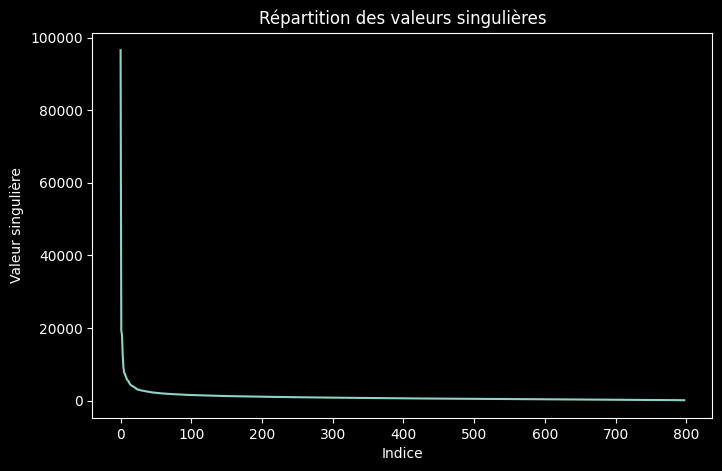

In [74]:
plt.figure(figsize=(8, 5))
plt.plot(S)
plt.title("Répartition des valeurs singulières")
plt.xlabel("Indice")
plt.ylabel("Valeur singulière")
plt.show()


Réponse :  
Les valeurs singulières sont classées dans un ordre décroissant. On observe généralement que les premières valeurs singulières sont très grandes, tandis que les suivantes diminuent rapidement. Cela suggère que seules quelques valeurs singulières portent la majorité de l'information contenue dans l'image, tandis que les petites valeurs représentent des détails de plus en plus fins ou du bruit.

Cette répartition peut être qualifiée de *loi de décroissance rapide*, où les premières valeurs dominent largement.


------------------


## Compression d'image



Dans cette partie, nous allons représenter la même image à partir d'une décomposition de la forme $U \Sigma V^\top$ de façon à utiliser moins d'espace, puis nous testerons visuellement le résultat.

### Filtrage


>__Question 6__ <br>
1. Écrire une fonction `filtre(A,t)` qui prend en entrée une matrice $A$ quelconque et un seuil de tolérance $\mathtt{t} \geq 0$, et renvoie la matrice $A_{(t)}$ qui coincide avec $A$, mais dans laquelle tous les coefficients vérifiant $A_{i,j} < t$ ont été remplacés par zéro
<br>
2. Évaluer visuellement le résultat lorsque $A$ correspond à l'image `M`. Faire varier le seuil $t$ : que constate-t-on ?

blanc : 255 
noir : 0


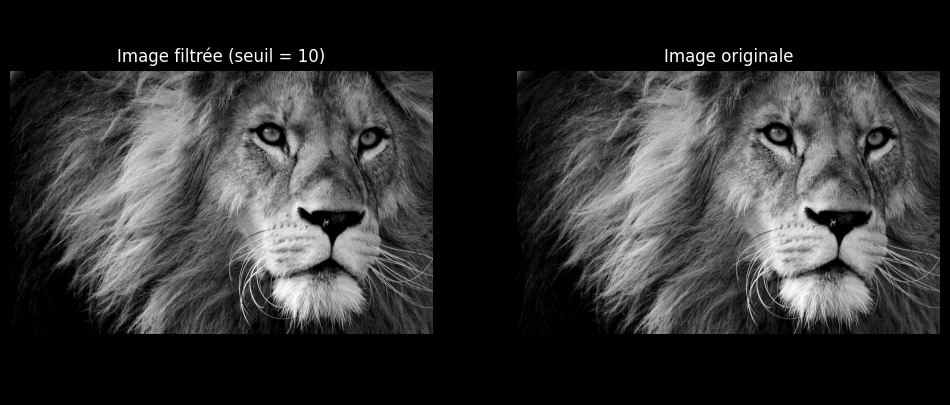

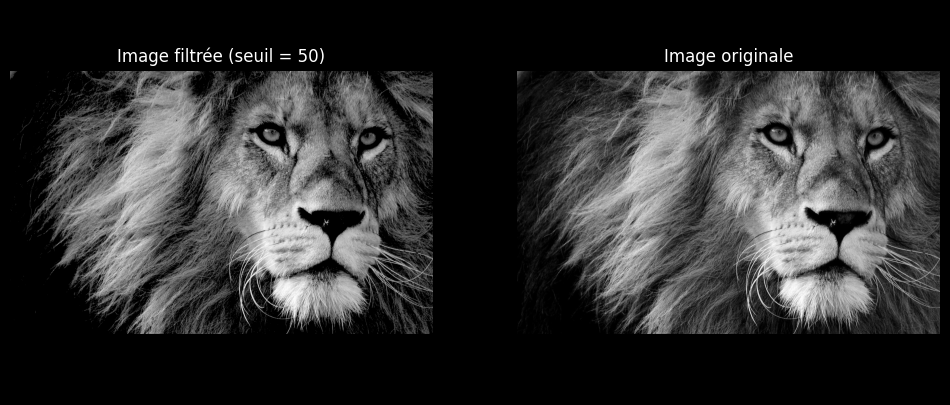

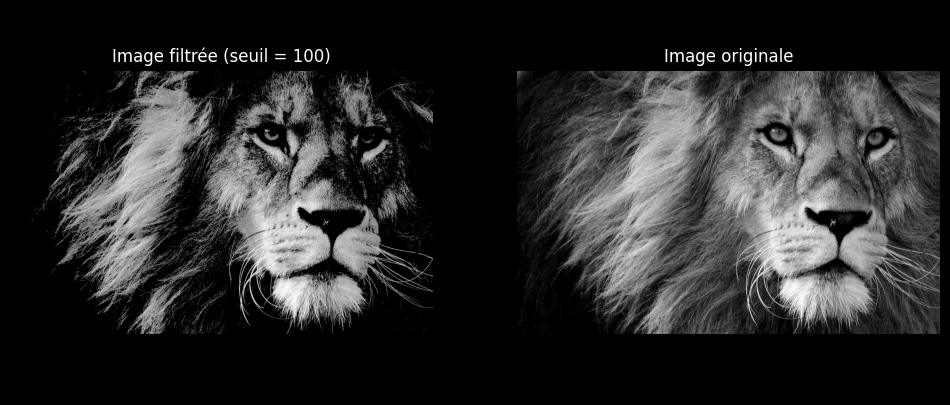

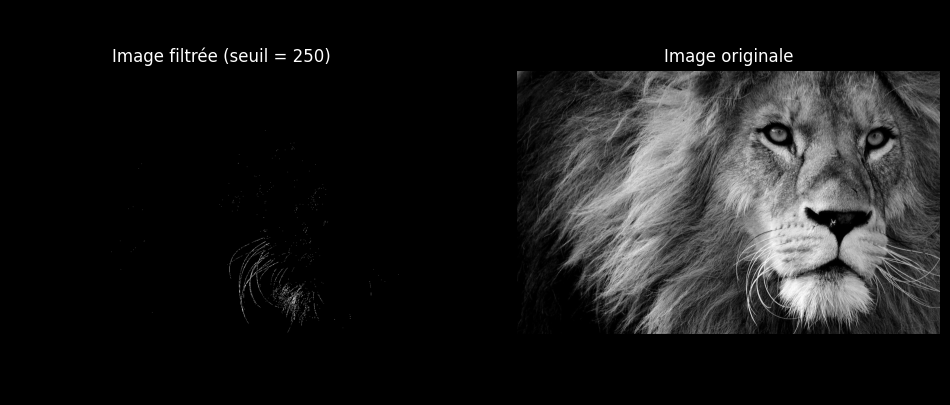

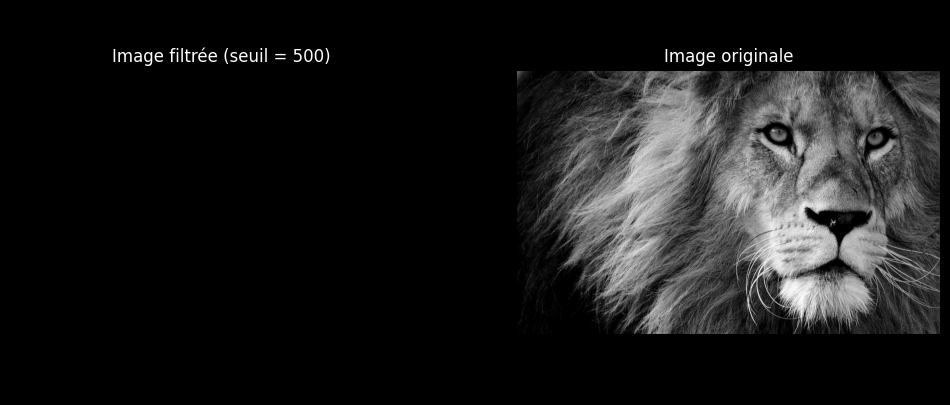

In [75]:
# 1.
def filtre(A, t):
    A_filtered = np.copy(A)
    A_filtered[A_filtered < t] = 0
    return A_filtered


# 2.
print("blanc :", np.max(M), "\nnoir :", np.min(M))
n, m = M.shape
seuils = [10, 50, 100, 250, 500]

for t in seuils:
    Mt = filtre(M, t)

    plt.subplots(figsize=(12, 5))
    plt.axis("off")

    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(Mt)
    titre = f"Image filtrée (seuil = {t})"
    plt.title(titre)

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(M)
    plt.title("Image originale")

    plt.show()


Réponse :  
- Lorsque le seuil $t$ est faible, l'image filtrée ressemble beaucoup à l'image originale, car peu de valeurs sont remplacées par des zéros.
- En augmentant progressivement le seuil, les zones sombres (les pixels ayant des valeurs faibles) sont remplacées par du noir, et seuls les pixels ayant des valeurs élevées restent visibles. 
- À un certain seuil, seules les parties les plus claires de l'image sont conservées, ce qui peut rendre l'image très "épurée", voire presque illisible pour des seuils très élevés.

Cela montre que les pixels d'une image ont des valeurs variant entre un minimum (noir) et un maximum (blanc), et que la tolérance au seuil affecte directement la visibilité des détails dans l'image.


>__Question 7__<br>
En utilisant la fonction précédente, calculer $U \Sigma_{(t)} V^\top$, où $U \Sigma V^\top$ est la décomposition en valeurs singulières de `M`.<br>
Faire varier le seuil $t$ : que constate-t-on visuellement ?

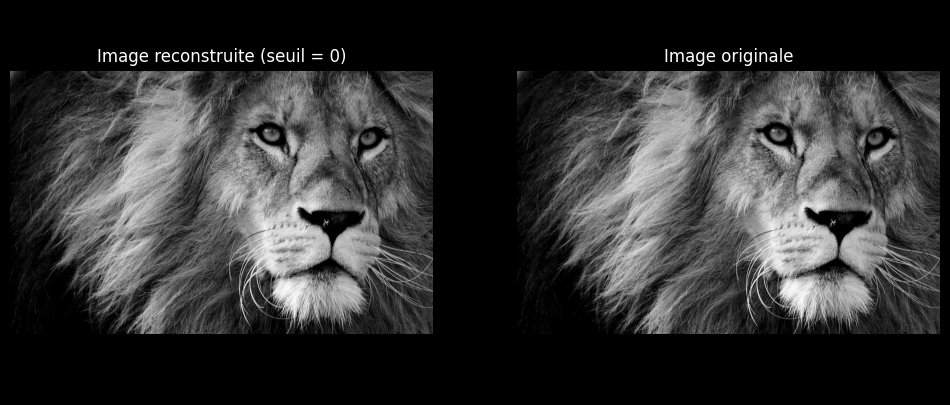

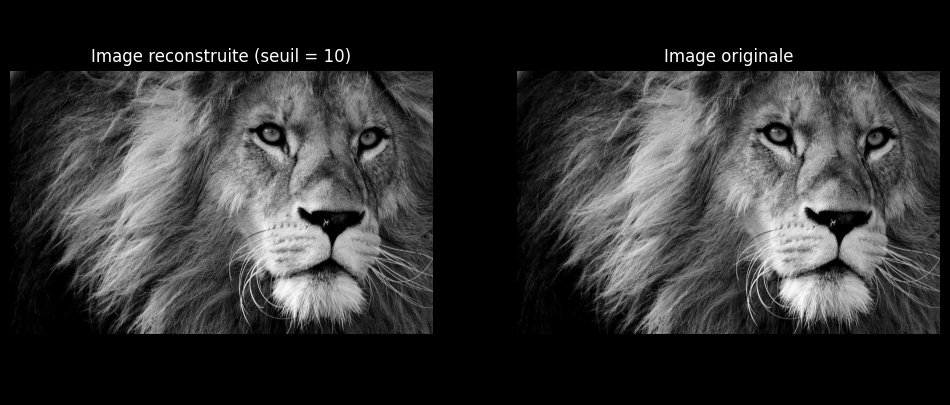

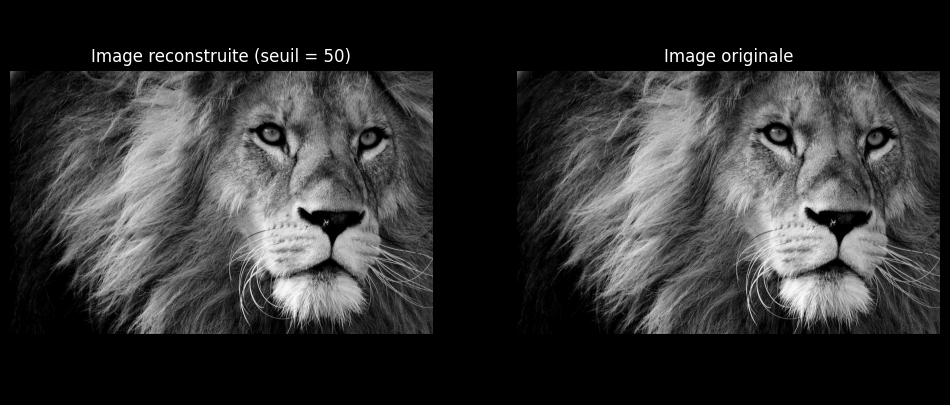

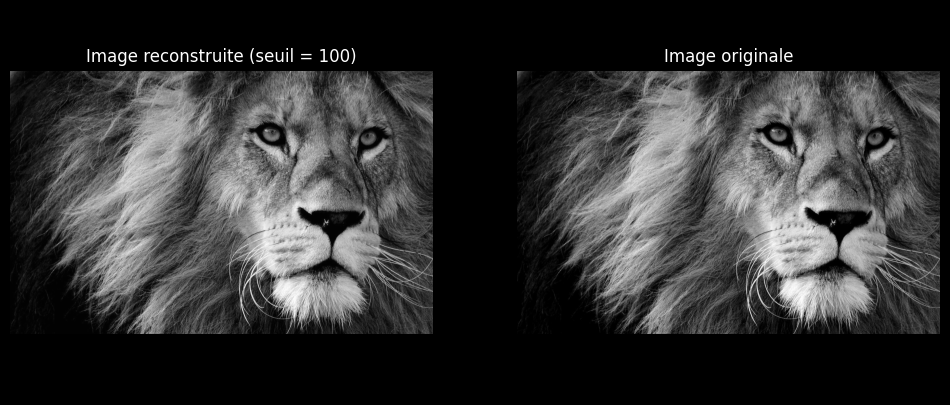

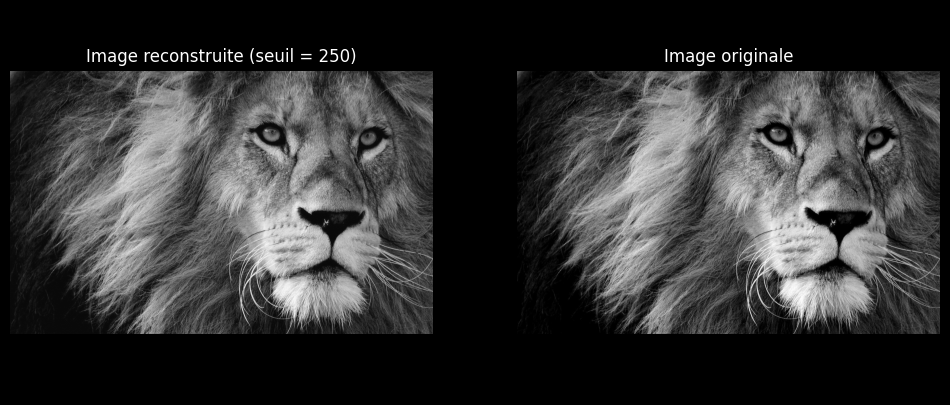

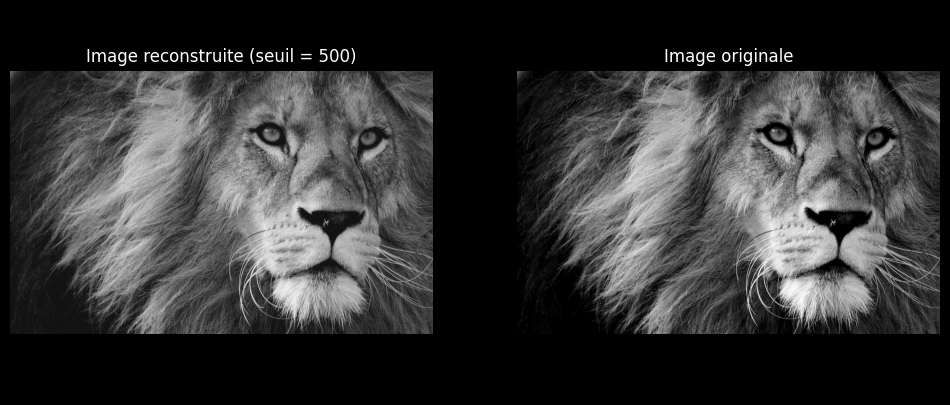

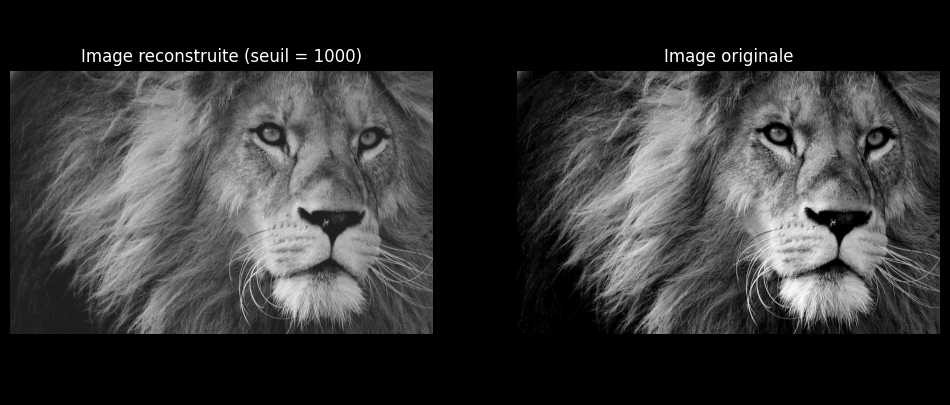

In [76]:
def reconstruire_image_svd(U, S, Vt, t):
    sigma = build(S, U.shape[0], Vt.shape[1])
    sigma_filtered = filtre(sigma, t)
    M_reconstructed = np.dot(U, np.dot(sigma_filtered, Vt))

    return M_reconstructed


seuils = [0, 10, 50, 100, 250, 500, 1000]

for t in seuils:
    M_reconstructed = reconstruire_image_svd(U, S, Vt, t)

    plt.subplots(figsize=(12, 5))
    plt.axis("off")

    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(M_reconstructed)
    titre = f"Image reconstruite (seuil = {t})"
    plt.title(titre)

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(M)
    plt.title("Image originale")

    plt.show()


Réponse :  
En faisant varier le seuil $t$, on observe les effets suivants :

- **Seuil faible (proche de 0)** : L'image reconstruite est presque identique à l'originale. Les petites valeurs singulières contribuent encore à la structure globale de l'image.
- **Seuil moyen** : On commence à perdre des détails fins dans l'image. Les éléments les moins significatifs sont filtrés, laissant une version plus simplifiée de l'image.
- **Seuil élevé** : Lorsque $t$ devient très grand, seule une partie de l'image est préservée. Les zones avec des variations de luminosité faibles disparaissent, ne laissant que les grandes structures de l'image.

En résumé, la compression par filtrage des valeurs singulières permet de simplifier l'image, mais à trop haute tolérance, les détails et la qualité visuelle de l'image sont dégradés.

>__Question 8__<br>
1. Écrire une fonction `filtreK(sigma, k)` qui, plutôt que de seuiller $\Sigma$ à une valeur $t$ fixée, renvoie $\Sigma^{(k)}$ ayant ses $k$ premiers coefficients diagonaux égaux à ceux de $\Sigma$, et zéro ailleurs. Le paramètre `sigma` est une matrice de taille $n\times m$ avec les valeurs singulières sur la diagonale ($\Sigma$).<br>
2. Calculer $U \Sigma^{(k)} V^\top$, où $U \Sigma V^\top$ est la décomposition en valeurs singulières de `M`.
Faire varier le seuil $k$ et commenter (en comparant visuellement les résultats avec la méthode précedente).

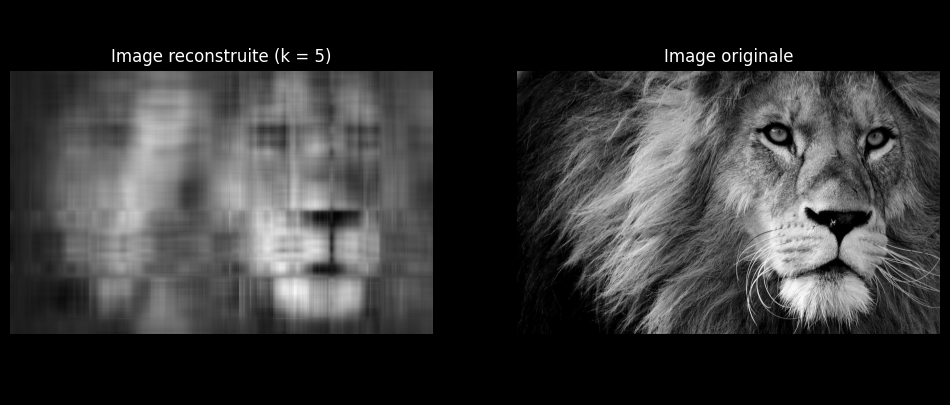

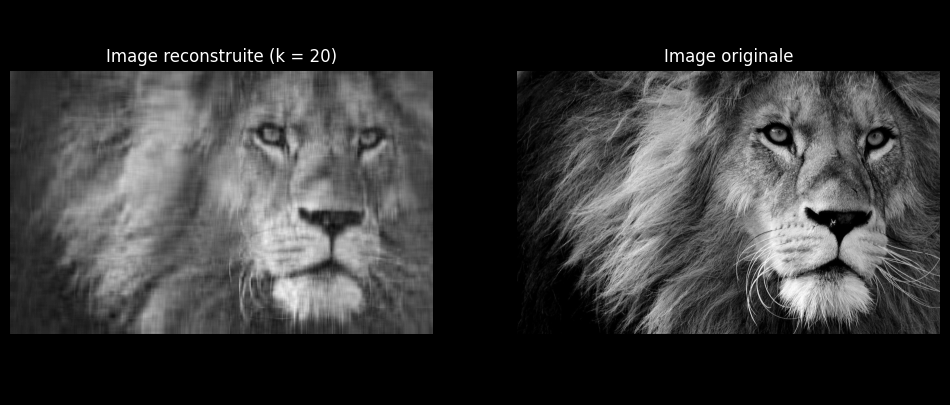

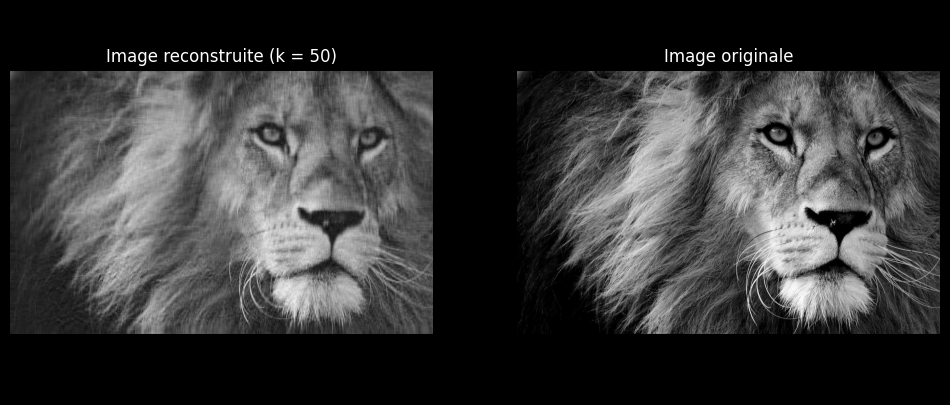

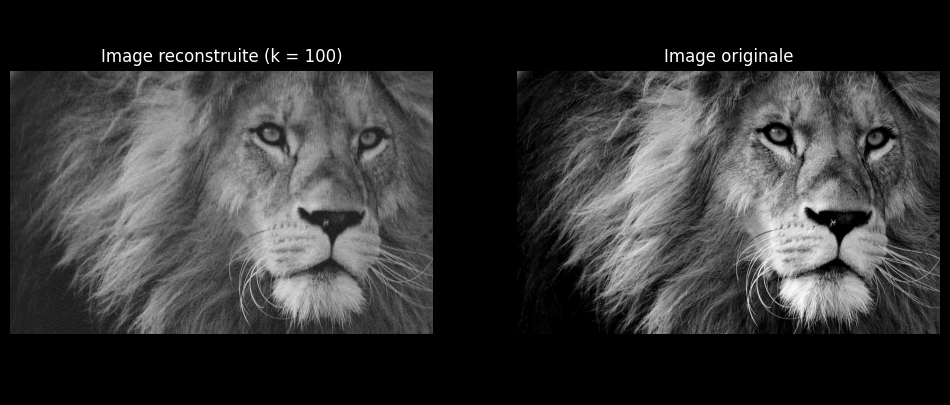

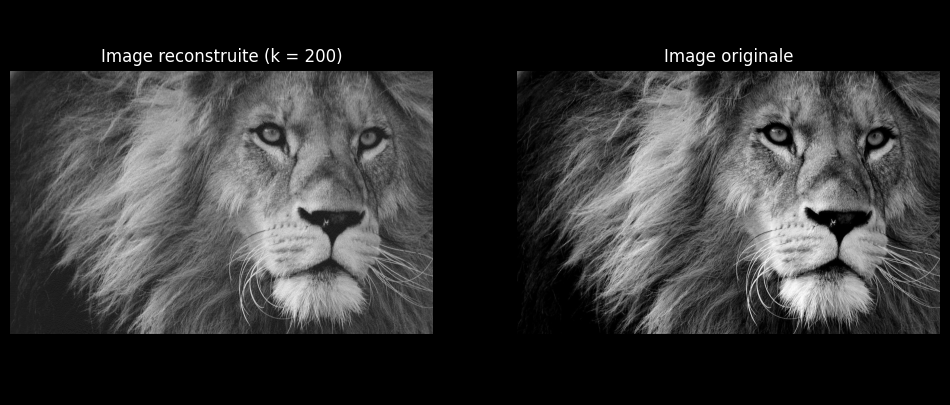

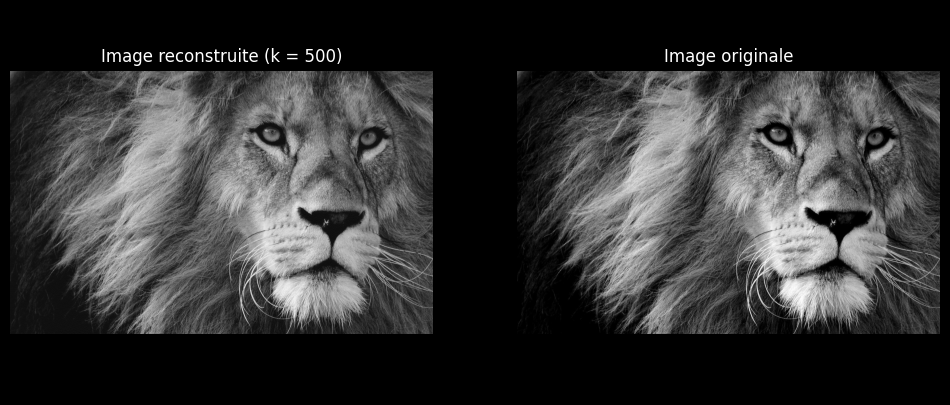

In [77]:
def filtreK(sigma, k):
    sigma_filtre = np.zeros_like(sigma)

    min_dim = min(sigma.shape[0], sigma.shape[1])
    for i in range(min(k, min_dim)):
        sigma_filtre[i, i] = sigma[i, i]

    return sigma_filtre


def reconstruire_image_svd_k(U, S, Vt, k):
    sigma = build(S, U.shape[0], Vt.shape[1])
    sigma_filtre = filtreK(sigma, k)
    M_reconstructed = np.dot(U, np.dot(sigma_filtre, Vt))

    return M_reconstructed


k_values = [5, 20, 50, 100, 200, 500]

for k in k_values:
    M_reconstructed_k = reconstruire_image_svd_k(U, S, Vt, k)

    plt.subplots(figsize=(12, 5))
    plt.axis("off")

    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(M_reconstructed_k)
    titre = f"Image reconstruite (k = {k})"
    plt.title(titre)

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(M)
    plt.title("Image originale")

    plt.show()


Réponse :  
- **Seuil $k$ faible (par exemple, $k = 5$)** : L'image reconstruite est très floue et manque de détails. Cela est dû au fait que seules les premières valeurs singulières sont utilisées, capturant uniquement les grandes structures de l'image.
- **Seuil $k$ moyen (par exemple, $k = 50$)** : L'image reconstruite devient de plus en plus claire et précise à mesure que $k$ augmente, car les détails supplémentaires sont progressivement pris en compte.
- **Seuil $k$ élevé (par exemple, $k = 200$)** : L'image reconstruite est très proche de l'originale, avec une qualité visuelle presque intacte. Cela montre que la majorité des détails de l'image sont contenus dans les premières 200 valeurs singulières.

En comparaison avec la méthode de filtrage par seuil $t$, la méthode basée sur $k$ permet de mieux contrôler la quantité de détails retenus. Lorsque l'on fixe un $k$, on conserve une quantité déterminée de valeurs singulières, qui correspondent aux informations les plus importantes de l'image.

### Compression


Comme on a conservé uniquement  $k$ valeurs non nulles pour $\Sigma$, on n'a plus besoin de stocker certaines informations dans $U$ et $V$.

Plus précisément, dans  $U \Sigma^{(k)} V^\top \approx M $, peut ne conserver  que les $k$ premières colonnes de $U$, les $k$ première lignes et colonnes de $\Sigma$ et les $k$ premières lignes de $V$.

On notera $U_k, \Sigma^{(k)}_k   $ et $V_k$ les matrices ainsi obtenue.


>__Question 9__<br>
1. Calculer $U_k \Sigma^{(k)}_k V^\top_k$, où $U \Sigma V^\top$ est la décomposition en valeurs singulières de `M`.<br> et faire varier le seuil $k$, constater que peu importe le choix de $k$ , on a $U_k \Sigma^{(k)}_k V^\top_k = U \Sigma^{(k)} V^\top$ (on pourra une nouvelle fois utiliser la fonction numpy `allclose` pour effectuer la comparaison)



La relation est vérifiée pour k = 5


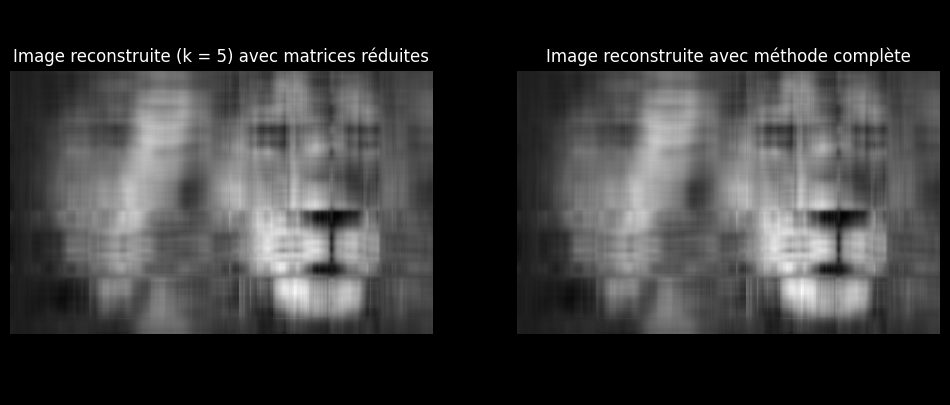

La relation est vérifiée pour k = 20


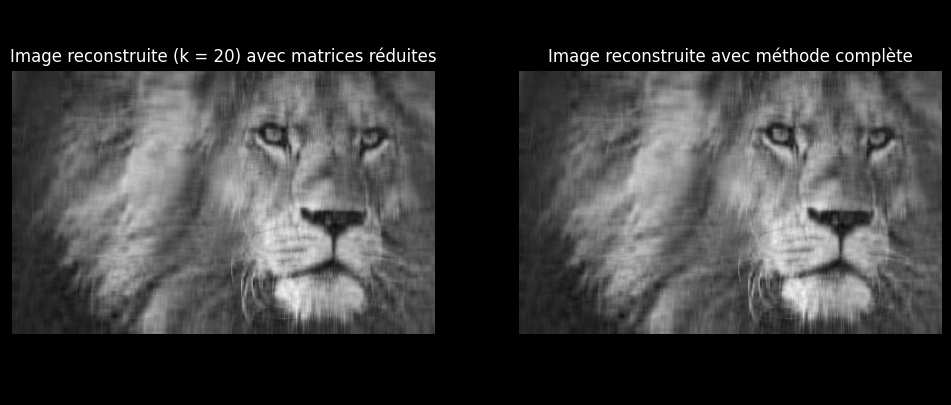

La relation est vérifiée pour k = 50


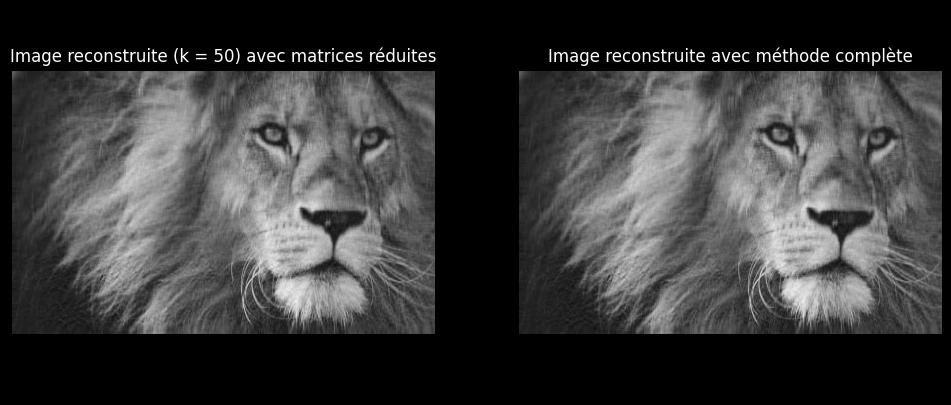

La relation est vérifiée pour k = 100


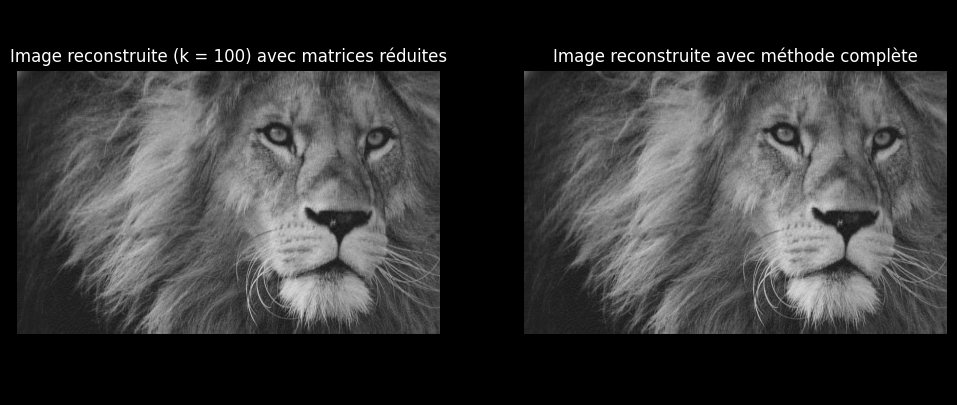

La relation est vérifiée pour k = 200


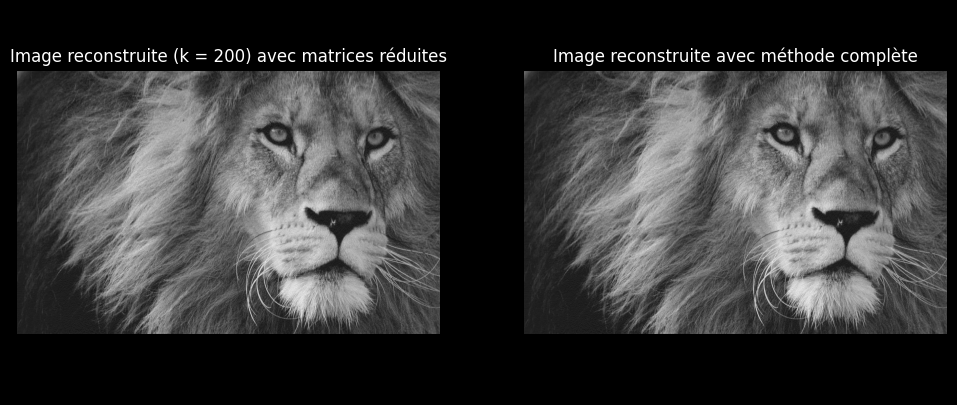

La relation est vérifiée pour k = 500


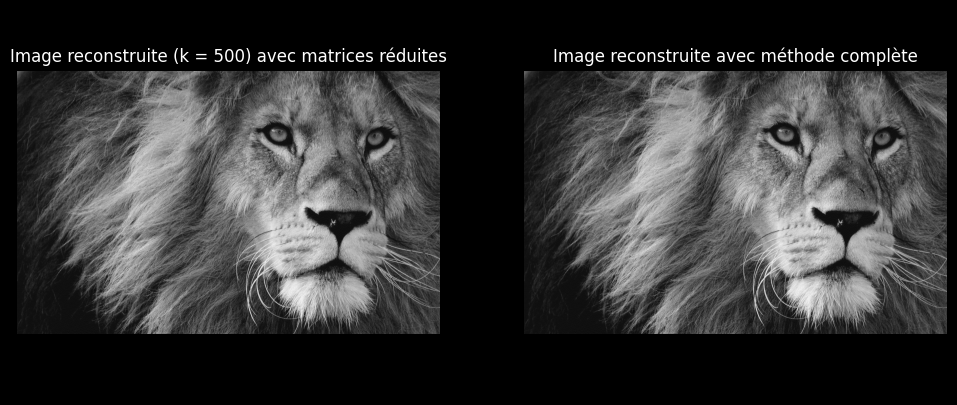

In [78]:
def calculer_uk_sigmak_vk(U, S, Vt, k):
    U_k = U[:, :k]
    sigma_k = np.diag(S[:k])
    V_k = Vt[:k, :]

    return U_k, sigma_k, V_k


def reconstruire_image_uk_sigmak_vk(U_k, sigma_k, V_k):
    return np.dot(U_k, np.dot(sigma_k, V_k))


k_values = [5, 20, 50, 100, 200, 500]

for k in k_values:
    U_k, sigma_k, V_k = calculer_uk_sigmak_vk(U, S, Vt, k)
    M_reconstructed_k = reconstruire_image_uk_sigmak_vk(U_k, sigma_k, V_k)
    M_reconstructed_full_k = reconstruire_image_svd_k(U, S, Vt, k)

    if np.allclose(M_reconstructed_k, M_reconstructed_full_k):
        print(f"La relation est vérifiée pour k = {k}")
    else:
        print(f"La relation n'est pas vérifiée pour k = {k}")

    plt.subplots(figsize=(12, 5))
    plt.axis("off")

    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(M_reconstructed_k)
    titre = f"Image reconstruite (k = {k}) avec matrices réduites"
    plt.title(titre)

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(M_reconstructed_full_k)
    plt.title("Image reconstruite avec méthode complète")

    plt.show()



>__Question 10__
1. Quel est la valeur littérale du taux de compression $\rho$ (c'est à dire, le nombre de coefficients dans $U_k \Sigma^{(k)}_k V^\top_k$  divisé par le nombre de coefficients dans l'image `M` d'origine)?
2. Écrire une fonction `txCompression(M, k)` calculant le taux de compression
3. Tracer ce ratio en fonction de $k$.
4. A partir de combien de valeurs propres, n'y a t'il plus de compression ?


Réponse 1.: 

Le taux de compression \(\rho\) est donné par :

$$
\rho = \frac{\text{Nombre de coefficients dans } U_k \Sigma^{(k)}_k V^\top_k}{\text{Nombre de coefficients dans l'image originale M}}
$$

Le nombre de coefficients dans $U_k \Sigma^{(k)}_k V^\top_k$ est :

- $U_k$ contient $n \times k$ coefficients (les $k$ premières colonnes de $U$),
- $\Sigma^{(k)}_k$ contient $k$ coefficients (les $k$ valeurs singulières),
- $V_k$ contient $k \times m$ coefficients (les $k$ premières lignes de $V^\top$).

Donc le nombre total de coefficients est $n \times k + k + k \times m$.

Le nombre de coefficients dans l'image originale $M$ est $n \times m$.

Ainsi, le taux de compression \(\rho\) est donné par :

$$
\rho = \frac{n \times k + k + k \times m}{n \times m}
$$


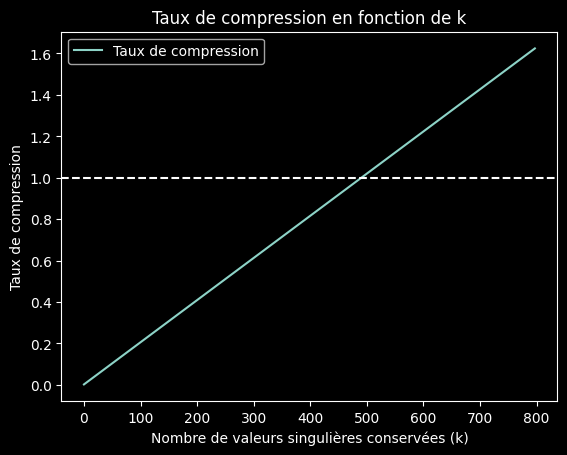

Nombre de valeurs singulières conservées au max pour avoir un taux inférieur à 1 : 491


In [79]:
def txCompression(M, k):
    n, m = M.shape
    nb_coeff_original = n * m
    nb_coeff_compressed = n * k + k + k * m

    return nb_coeff_compressed / nb_coeff_original


n, m = M.shape
nbValSinguliere = min(n, m)

taux = []
for k in range(1, nbValSinguliere + 1):
    taux.append(txCompression(M, k))

plt.plot(taux, label="Taux de compression")
plt.legend()
plt.axhline(y=1, color="white", linestyle="--", label="Taux = 1")
plt.xlabel("Nombre de valeurs singulières conservées (k)")
plt.ylabel("Taux de compression")
plt.title("Taux de compression en fonction de k")
plt.show()

k_max_compression = next(k for k, ratio in enumerate(taux) if ratio >= 1)
print(
    "Nombre de valeurs singulières conservées au max pour avoir un taux inférieur à 1 :",
    k_max_compression,
)


Réponse 4.:  
Le taux de compression devient égal ou supérieur à 1 lorsque toutes les valeurs singulières sont conservées ou lorsque $k$ atteint une certaine valeur. D'après le tracé, il est possible d'identifier cette valeur critique.

D'après le graphique et l'analyse du taux de compression, le nombre maximum de valeurs singulières à conserver tout en ayant un taux de compression inférieur à 1 est **491**.

Cela signifie qu'à partir de 491 valeurs singulières, la taille de la représentation compressée devient égale ou supérieure à la taille de l'image originale, et donc, au-delà de ce point, il n'y a plus de gain en termes de compression.


>__Question 11__<br>
Écrire une fonction `affiche(M,k)` qui affiche l'image où l'on a gardé que les $k$ premières valeurs et renvoie le taux de compression

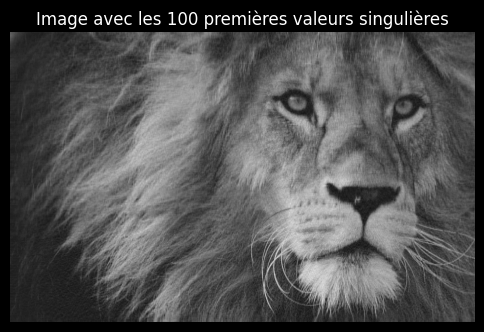

Taux de compression :  0.20353618421052633


In [80]:
def affiche(M, k):
    U, S, Vt = la.svd(M)

    U_k, sigma_k, V_k = calculer_uk_sigmak_vk(U, S, Vt, k)
    M_reconstructed_k = reconstruire_image_uk_sigmak_vk(U_k, sigma_k, V_k)

    plt.figure(figsize=(6, 6))
    plt.imshow(M_reconstructed_k, cmap="gray")
    plt.title(f"Image avec les {k} premières valeurs singulières")
    plt.axis("off")
    plt.show()

    taux = txCompression(M, k)

    return taux


print("Taux de compression : ", affiche(M, 100))



>__Question 12__
En utilisant la formule du taux de compression, écrire une fonction `afficheRatio(M,r)` qui affiche l'image compressée à un taux/ratio de $r$ et retourne `k`, le nombre de valeurs singulières conservées.

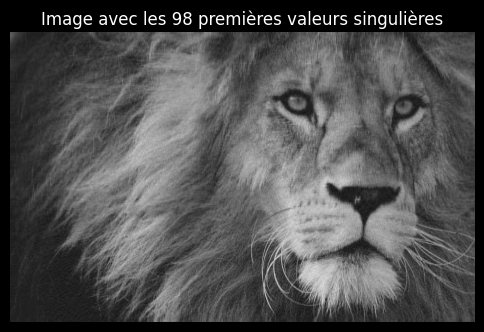

98


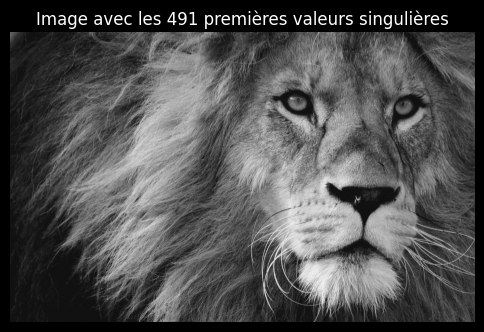

491


In [81]:
def afficheRatio(M, r):
    n, m = M.shape
    nb_coeff_original = n * m
    k = int((r * nb_coeff_original) / (n + m + 1))

    affiche(M, k)

    return k


print(afficheRatio(M, 0.2))
print(afficheRatio(M, 1))


## Débruitage d'images

Dans cette partie, on se donne une image bruitee, representee par la matrice `Mb` definie comme suit:

In [82]:
epsilon = 50
Mb = M + epsilon*np.random.normal(0,1,size=(np.shape(M)[0],np.shape(M)[1]))



>__Question 13__<br>
Visualiser l'image bruitée

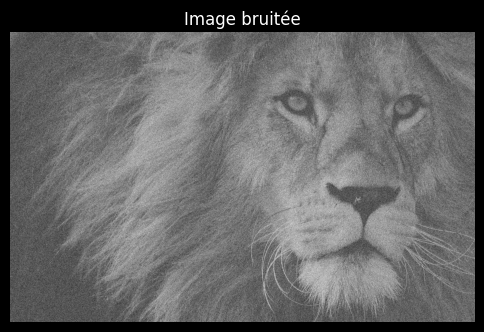

In [83]:
plt.figure(figsize=(6, 6))
plt.imshow(Mb, cmap="gray")
plt.title("Image bruitée")
plt.axis("off")
plt.show()


On mesure l'écart induit par le bruit en calculant $\Vert M_b − M\Vert$ : 

In [84]:
normb = la.norm(Mb-M)
print(normb)


50508.13734326005



>__Question 14__<br>
Calculer la décomposition SVD de `Mb`, et filtrer ses valeurs singulières plus petites que
$t = 3000$.<br>
Comment vous apparaît l'image $M_r(t)$ ainsi obtenue ? 
<br>Calculer $\Vert M_r(t) - M \Vert$.
>Qu'en concluez-vous ?

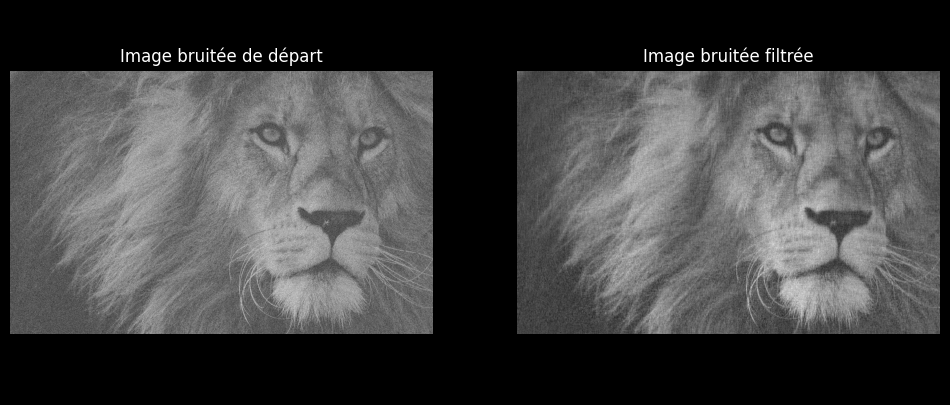

Écart entre M_r(t) et M : 33605.323863179656


In [85]:
U_b, S_b, Vt_b = la.svd(Mb)
t = 3000


def filtre_valeurs_singulieres(S, t):
    S_filtre = np.copy(S)
    S_filtre[S_filtre < t] = 0
    return S_filtre


S_b_filtre = filtre_valeurs_singulieres(S_b, t)

sigma_b_filtre = build(S_b_filtre, U_b.shape[0], Vt_b.shape[1])
Mr = np.dot(U_b, np.dot(sigma_b_filtre, Vt_b))

plt.subplots(figsize=(12, 5))
plt.axis("off")

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(Mb)
plt.title("Image bruitée de départ")

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(Mr)
plt.title("Image bruitée filtrée")
plt.show()

norm_r = la.norm(Mr - M)
print("Écart entre M_r(t) et M :", norm_r)


Réponse :  
- Après avoir filtré les valeurs singulières de l'image bruitée `Mb` en dessous du seuil $t = 3000$, l'image obtenue, $M_r(t)$, semble beaucoup plus propre. Le bruit aléatoire a été réduit, mais certains détails fins de l'image peuvent aussi être lissés ou supprimés, ce qui peut rendre l'image légèrement floue. Globalement, l'image est beaucoup plus proche de l'originale.
- En calculant l'écart entre l'image filtrée $M_r(t)$ et l'image originale $M$, nous obtenons un écart inférieur à celui observé avec l'image bruitée.

Cela montre que la décomposition SVD et le filtrage des petites valeurs singulières permettent de débruiter efficacement une image, en éliminant les composants qui contribuent le plus au bruit. Cependant, il est important de choisir correctement le seuil $t$ pour ne pas trop perdre de détails dans l'image.


>__Question 15__<br>
En calculant $\Vert M_r(t) - M \Vert$ pour différentes valeurs de $t$, estimer la valeur $t^\ast$ pour laquelle l'erreur est minimale. 
<br>Visualiser l'image ainsi débruitée.

In [86]:
def filtre_svd_et_reconstruire(U, S, Vt, t):
    S_filtre = filtre_valeurs_singulieres(S, t)
    sigma_filtre = build(S_filtre, U.shape[0], Vt.shape[1])
    M_reconstruit = np.dot(U, np.dot(sigma_filtre, Vt))

    return M_reconstruit


t_values = [500, 1000, 2000, 3000, 4000, 5000, 6000]
errors = []

U_b, S_b, Vt_b = la.svd(Mb)

for t in t_values:
    M_r_t = filtre_svd_et_reconstruire(U_b, S_b, Vt_b, t)
    error = la.norm(M_r_t - M)
    errors.append(error)
    print(f"Erreur pour t = {t} : {error}")

t_star = t_values[np.argmin(errors)]
print(f"Meilleure valeur de t (t*) : {t_star}")


Erreur pour t = 500 : 50491.72111672956
Erreur pour t = 1000 : 49881.11972458517
Erreur pour t = 2000 : 44757.7211350141
Erreur pour t = 3000 : 33605.323863179656
Erreur pour t = 4000 : 28817.837045339278
Erreur pour t = 5000 : 30095.71827071073
Erreur pour t = 6000 : 31014.219925280468
Meilleure valeur de t (t*) : 4000


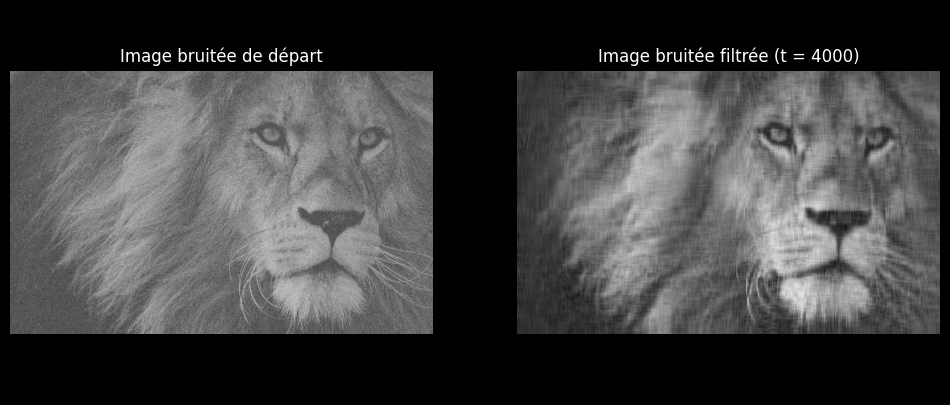

In [87]:
Mr = filtre_svd_et_reconstruire(U_b, S_b, Vt_b, t_star)

plt.subplots(figsize=(12, 5))
plt.axis("off")

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(Mb)
plt.title("Image bruitée de départ")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(Mr)
plt.title(f"Image bruitée filtrée (t = {t_star})")
plt.show()
